In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame



In [2]:
Main_df = pd.read_csv("data_set.csv")

In [3]:
Main_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
count,5.641000e+03,5641.000000,5641.000000,5641.000000,5641.000000,5.641000e+03,5641.000000,5641.000000,5641.000000,5641.000000,...,5641.000000,5641.000000,5641.000000,5366.000000,5641.000000,5641.000000,5641.000000,5564.000000,5641.000000,5641.000000
mean,4.067590e+07,15732.396738,15732.396738,15727.051941,504.888837,9.609294e+04,15.243561,0.415706,695.859777,699.859954,...,3.282751,7.730367,8.297997,0.001864,0.004077,0.114341,2.037050,35.993812,0.162914,0.184719
std,1.866962e+07,9307.174445,9307.174445,9302.668516,300.023861,8.242079e+04,8.722700,1.030920,33.956272,33.957053,...,2.129080,4.621928,7.392421,0.047257,0.063729,0.592693,1.723598,34.538474,0.427196,1.011593
min,3.547950e+05,1000.000000,1000.000000,1000.000000,32.740000,8.000000e+03,0.000000,0.000000,660.000000,664.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.296274e+07,8050.000000,8050.000000,8050.000000,277.290000,5.200000e+04,8.390000,0.000000,670.000000,674.000000,...,2.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.127687e+07,14175.000000,14175.000000,14175.000000,436.790000,7.500000e+04,14.340000,0.000000,685.000000,689.000000,...,3.000000,7.000000,6.000000,0.000000,0.000000,0.000000,2.000000,33.300000,0.000000,0.000000
75%,5.831029e+07,21525.000000,21525.000000,21500.000000,683.360000,1.136000e+05,21.000000,0.000000,710.000000,714.000000,...,4.000000,10.000000,11.000000,0.000000,0.000000,0.000000,3.000000,60.000000,0.000000,0.000000
max,6.861613e+07,35000.000000,35000.000000,35000.000000,1424.570000,1.500000e+06,39.990000,15.000000,845.000000,850.000000,...,17.000000,42.000000,65.000000,2.000000,1.000000,12.000000,17.000000,100.000000,5.000000,39.000000


In [4]:
#Main_df.head(1)

In [5]:
id_df = Main_df['id']

In [6]:
id_df.describe()

count    5.641000e+03
mean     4.067590e+07
std      1.866962e+07
min      3.547950e+05
25%      2.296274e+07
50%      4.127687e+07
75%      5.831029e+07
max      6.861613e+07
Name: id, dtype: float64

In [7]:
import xlsxwriter

In [8]:
writer = pd.ExcelWriter('new_data_set_1.xlsx', engine='xlsxwriter')


In [11]:
#Main_df.to_excel(writer,'Sheet1')
#writer.save()

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

#sns.set_style('whitegrid')

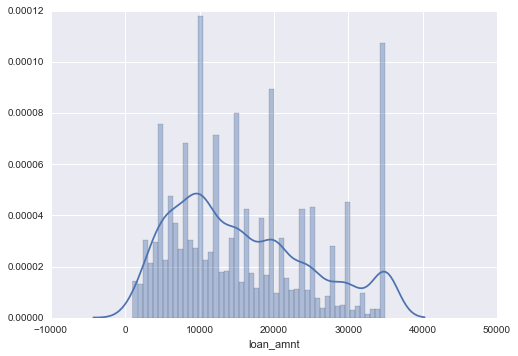

In [10]:
#Loan ammount by each ID
sns.distplot(Main_df['loan_amnt'], bins=50)

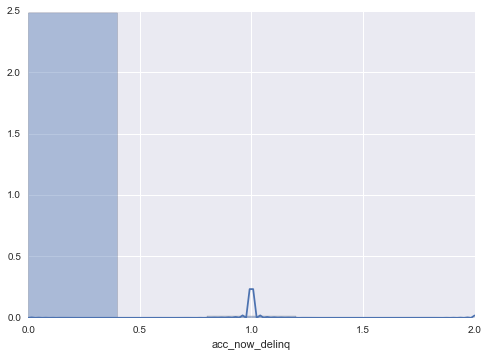

In [13]:
#Distribution of The number of accounts on which the borrower is now delinquent
sns.distplot(Main_df['acc_now_delinq'],bins = 5)


In [16]:
sample_df = Main_df

In [17]:
#sample_df[sample_df['acc_now_delinq'] > 0]
#distribution of loan amount who has atleast 1 delinq
acc_now_delinq_loan_amnt = sample_df[sample_df['acc_now_delinq'] > 0]['loan_amnt']

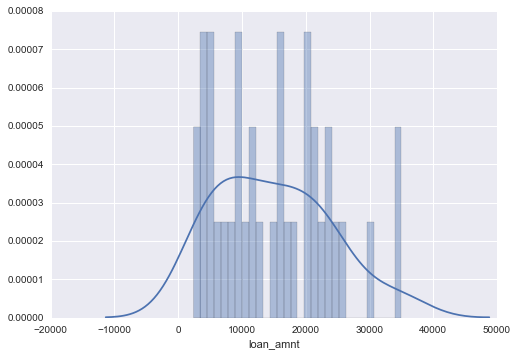

In [26]:
sns.distplot(acc_now_delinq_loan_amnt, bins=30)

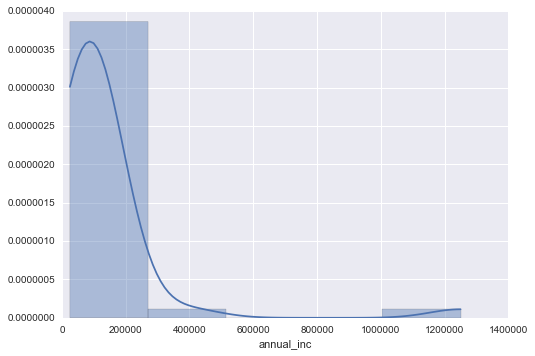

In [62]:
sns.distplot(sample_df[sample_df['acc_now_delinq'] > 0]['annual_inc'], bins=5)

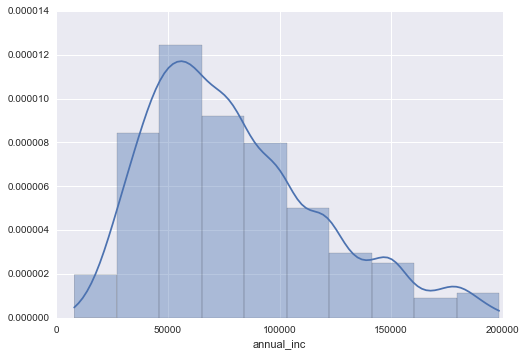

In [68]:
sns.distplot(sample_df[sample_df['annual_inc'] < 200000]['annual_inc'], bins=10)

In [82]:
sample_df['loan_status'].value_counts()

Current               4264
Fully Paid             759
Charged Off            359
Late (31-120 days)     148
In Grace Period         70
Late (16-30 days)       35
Default                  6
Name: loan_status, dtype: int64

In [94]:
#corr_df = sample_df['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'delinq_2yrs', 'fico_range_low', 'fico_range_high','open_acc','pub_rec', 'total_acc','acc_now_delinq', 'tot_cur_bal', 'acc_open_past_24mths', 'avg_cur_bal', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'tax_liens']                        

In [102]:
#x = sample_df['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
#sns.pairplot(sample_df['loan_amnt', 'funded_amnt', 'funded_amnt_inv'])

In [114]:
sample_df['loan_amnt'].describe()

count      5642
unique      868
top       35000
freq        404
Name: loan_amnt, dtype: int64

In [118]:
#y.describe()

In [116]:
#sample_df['funded_amnt'].describe()

In [117]:
#sample_df['funded_amnt_inv'].describe()

In [120]:
sample_df['term'].value_counts()

 36 months    4062
 60 months    1579
Name: term, dtype: int64

In [154]:
def change_term(data):
    new_df = []
    for x in data:
        if(x == ' 36 months'):
            new_df = 60
        else:
            new_df = 36
    return new_df
            

In [150]:
term_df = pd.DataFrame()
term_df.cols = ['trans_term']

In [155]:
term_df['trans_term'] = sample_df['term'].apply(change_term)

In [156]:
term_df['trans_term'].value_counts()

36    5641
Name: trans_term, dtype: int64

In [153]:
sample_df['term'].value_counts()

 36 months    4062
 60 months    1579
Name: term, dtype: int64

In [160]:
sample_df['emp_title'].describe()

count      5355
unique     2659
top       Owner
freq        514
Name: emp_title, dtype: object

In [162]:
sample_df['emp_length'].describe()

count          5641
unique           12
top       10+ years
freq           1647
Name: emp_length, dtype: object

In [164]:
#employee length
sample_df['emp_length'].value_counts()

10+ years    1647
2 years       594
3 years       561
< 1 year      439
5 years       403
1 year        390
4 years       374
8 years       307
7 years       301
6 years       279
9 years       177
n/a           169
Name: emp_length, dtype: int64

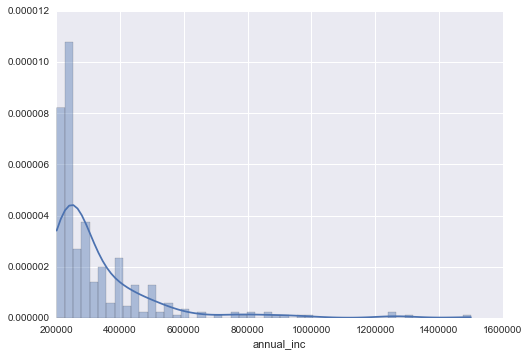

In [174]:
#x = sample_df[sample_df['loan_amnt'] < 29000]['id']
sns.distplot(sample_df[sample_df['annual_inc'] > 200000]['annual_inc'], bins=50)

35000    404
34750      2
34025      2
34875      2
34225      1
34625      1
34100      1
34550      1
34475      1
34375      1
Name: loan_amnt, dtype: int64


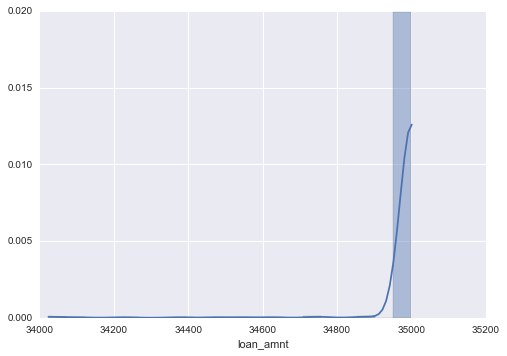

In [203]:
sns.distplot(sample_df[sample_df['loan_amnt'] > 34000]['loan_amnt'])
print sample_df[sample_df['loan_amnt'] > 34000]['loan_amnt'].value_counts()

In [206]:
sample_df['emp_title'].describe()

count      5355
unique     2659
top       Owner
freq        514
Name: emp_title, dtype: object

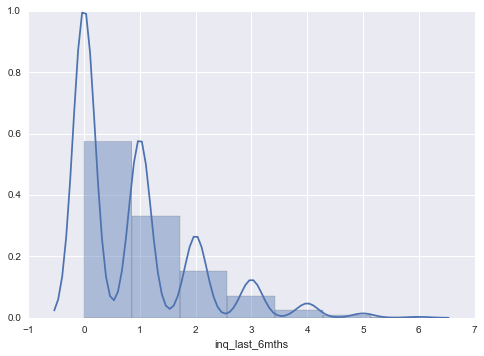

In [209]:
sns.distplot(sample_df['inq_last_6mths'],bins=7)

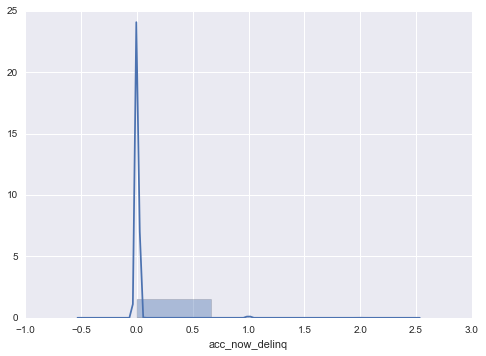

In [216]:
sns.distplot(sample_df['acc_now_delinq'], bins=3)

In [219]:
sample_df['mths_since_recent_bc'].describe()

count    5573.000000
mean       26.042885
std        33.722658
min         0.000000
25%         6.000000
50%        14.000000
75%        31.000000
max       373.000000
Name: mths_since_recent_bc, dtype: float64

In [27]:
sample_df.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,...,num_actv_bc_tl,num_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,37611926,33950,33950,33950,36 months,23.99%,1331.78,VP of IT,3 years,RENT,...,2,3,10,0.0,0,0,2,0.0,0,0


In [29]:
Main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5641 entries, 0 to 5640
Data columns (total 56 columns):
id                             5641 non-null int64
loan_amnt                      5641 non-null int64
funded_amnt                    5641 non-null int64
funded_amnt_inv                5641 non-null int64
term                           5641 non-null object
int_rate                       5641 non-null object
installment                    5641 non-null float64
emp_title                      5355 non-null object
emp_length                     5641 non-null object
home_ownership                 5641 non-null object
annual_inc                     5641 non-null float64
verification_status            5641 non-null object
issue_d                        5641 non-null object
loan_status                    5641 non-null object
purpose                        5641 non-null object
zip_code                       5641 non-null object
addr_state                     5641 non-null object
dti        

In [33]:
Main_df['home_ownership'].describe()

count     5641
unique       3
top       RENT
freq      2539
Name: home_ownership, dtype: object

In [34]:
Main_df['home_ownership'].value_counts()

RENT        2539
MORTGAGE    2471
OWN          631
Name: home_ownership, dtype: int64